<a href="https://colab.research.google.com/github/JATINBHORE/object_detection_twitter/blob/master/twitterobjectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
repo_url = 'https://github.com/JATINBHORE/object_detection_twitter'
num_steps = 800  
num_eval_steps = 50
MODELS_CONFIG = {
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    }
}
selected_model = 'faster_rcnn_inception_v2'
MODEL = MODELS_CONFIG[selected_model]['model_name']
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']
batch_size = MODELS_CONFIG[selected_model]['batch_size']

In [23]:
print(repo_dir_path)

C:\Users\Varun Nair\PycharmProjects\twitter\object_detection_twitter


In [5]:
import os
%cd content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))
!git clone {repo_url}
%cd {repo_dir_path}
!git pull

C:\Users\Varun Nair\PycharmProjects\twitter\object_detection_twitter\object_detection_twitter\content
C:\Users\Varun Nair\PycharmProjects\twitter\object_detection_twitter\object_detection_twitter\content\object_detection_twitter


Cloning into 'object_detection_twitter'...


Already up to date.


In [35]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk


#!python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

In [ ]:
#%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

error: unable to create file official/utils/testing/reference_data/resnet/batch-size-32_bottleneck_projection_version-1_width-8_channels-4/model.ckpt.data-00000-of-00001: Filename too long
error: unable to create file official/utils/testing/reference_data/resnet/batch-size-32_bottleneck_projection_version-1_width-8_channels-4/model.ckpt.index: Filename too long
error: unable to create file official/utils/testing/reference_data/resnet/batch-size-32_bottleneck_projection_version-2_width-8_channels-4/model.ckpt.data-00000-of-00001: Filename too long
error: unable to create file official/utils/testing/reference_data/resnet/batch-size-32_bottleneck_projection_version-2_width-8_channels-4/model.ckpt.index: Filename too long
error: unable to create file official/utils/testing/reference_data/resnet/batch-size-32_bottleneck_version-1_width-8_channels-4/model.ckpt.data-00000-of-00001: Filename too long
error: unable to create file official/utils/testing/reference_data/resnet/batch-size-32_bottle

In [4]:
#%cd {repo_dir_path}

!python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations
!python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

!python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt
!python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt

/content/object_detection_twitter
Successfully converted xml to csv.
Generate `data/annotations/label_map.pbtxt`
Successfully converted xml to csv.


W1105 00:51:50.928732 140528455051136 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1105 00:51:50.939156 140528455051136 module_wrapper.py:139] From /content/models/research/object_detection/utils/label_map_util.py:137: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object_detection_twitter/data/annotations/train.record


W1105 00:51:54.540202 139932951046016 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1105 00:51:54.548234 139932951046016 module_wrapper.py:139] From /content/models/research/object_detection/utils/label_map_util.py:137: The name tf.gfile.GFil

In [6]:
test_record_fname = 'C:/Users/Varun Nair/PycharmProjects/twitter/object_detection_twitter/data/annotations/test.record'
train_record_fname = 'C:/Users/Varun Nair/PycharmProjects/twitter/object_detection_twitter/data/annotations/train.record'
label_map_pbtxt_fname = 'C:/Users/Varun Nair/PycharmProjects/twitter/object_detection_twitter/data/annotations/label_map.pbtxt'

In [7]:
#%cd /content/models/research
#C:\Users\Varun Nair\PycharmProjects\twitter\models\research
import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'C:/Users/Varun Nair/PycharmProjects/twitter/models/research/pretrained_model/'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

In [35]:
!echo {DEST_DIR}


C:/Users/Varun Nair/PycharmProjects/twitter/models/research/pretrained_model/


In [8]:
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'C:/Users/Varun Nair/PycharmProjects/twitter/models/research/pretrained_model/model.ckpt'

In [9]:
import os
pipeline_fname = os.path.join('C:/Users/Varun Nair/PycharmProjects/twitter/models/research/object_detection/samples/configs/', pipeline_file)

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [17]:
pipeline_fname

'C:/Users/Varun Nair/PycharmProjects/twitter/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config'

In [10]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [11]:
import re

num_classes = get_num_classes(label_map_pbtxt_fname)
print(num_classes)
with open(pipeline_fname) as f:
    s = f.read()
    print(s)
with open(pipeline_fname, 'w') as f:
    
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    f.write(s)
    

1
# Faster R-CNN with Inception v2, configured for Oxford-IIIT Pets Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  faster_rcnn {
    num_classes: 1
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: 'faster_rcnn_inception_v2'
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        t

In [12]:
print(pipeline_fname)
#!cat {pipeline_fname}

C:/Users/Varun Nair/PycharmProjects/twitter/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config


In [15]:
model_dir = 'training/'
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

In [14]:
%pwd



'C:\\Users\\Varun Nair\\PycharmProjects\\twitter'

In [44]:
%pwd



'C:\\Users\\Varun Nair\\PycharmProjects\\twitter'

In [18]:
#!python /content/models/research/object_detection/model_main.py \
!python models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

Traceback (most recent call last):
  File "models/research/object_detection/model_main.py", line 29, in <module>
    import model_lib
  File "C:\Users\Varun Nair\PycharmProjects\twitter\models\research\object_detection\model_lib.py", line 43, in <module>
    import eval_util
  File "C:\Users\Varun Nair\PycharmProjects\twitter\models\research\object_detection\eval_util.py", line 33, in <module>
    from object_detection.metrics import coco_evaluation
  File "C:\Users\Varun Nair\PycharmProjects\twitter\models\research\object_detection\metrics\coco_evaluation.py", line 25, in <module>
    from object_detection.metrics import coco_tools
  File "C:\Users\Varun Nair\PycharmProjects\twitter\models\research\object_detection\metrics\coco_tools.py", line 51, in <module>
    from pycocotools import coco
ModuleNotFoundError: No module named 'pycocotools'


In [16]:
import re
import numpy as np

output_directory = './fine_tuned_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
#!python /content/models/research/object_detection/export_inference_graph.py \
!python models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

training/model.ckpt-44


2019-12-05 16:43:57.384525: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2019-12-05 16:43:57.384864: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Traceback (most recent call last):
  File "models/research/object_detection/export_inference_graph.py", line 108, in <module>
    from object_detection import exporter
  File "C:\Users\Varun Nair\PycharmProjects\twitter\models\research\object_detection\exporter.py", line 24, in <module>
    from ob

In [18]:
import os

pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

In [19]:
import os
import glob

PATH_TO_CKPT = pb_fname
PATH_TO_LABELS = label_map_pbtxt_fname
PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "test")

assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['C:\\Users\\Varun Nair\\PycharmProjects\\twitter\\object_detection_twitter\\test\\4.jpg']


In [22]:
import tensorflow as tf
print(output_directory)

./fine_tuned_model


Array of bounding boxes [0.04775967 0.08664207 0.4596554  1.        ] 1
Array of bounding boxes [0.14119303 0.22638096 0.91951275 1.        ] 1
Array of bounding boxes [0.01564585 0.06777294 0.7402496  0.9304814 ] 1
Array of bounding boxes [0.6715482 0.2021808 0.9905757 0.7924182] 1
Array of bounding boxes [0.29452646 0.37009206 1.         1.        ] 1
Array of bounding boxes [0.78472173 0.36351338 1.         1.        ] 1
Array of bounding boxes [0.         0.         0.38132346 0.77329403] 1
Array of bounding boxes [0.05990504 0.37197202 0.94709986 0.9327687 ] 1
Array of bounding boxes [0.51708746 0.17848365 1.         0.9592264 ] 1
Array of bounding boxes [0.12080338 0.00106974 0.9236133  0.54108185] 1
Array of bounding boxes [0.03025494 0.         0.26920852 0.700319  ] 1
Array of bounding boxes [0.18829535 0.14246973 1.         0.75925297] 1
Array of bounding boxes [0.         0.         0.62714165 0.7916113 ] 1
Array of bounding boxes [0.58318746 0.35780373 1.         1.        

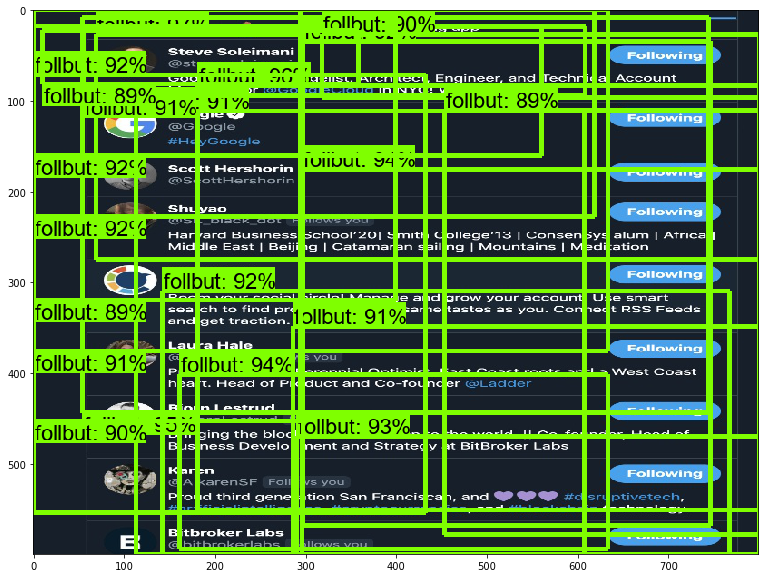

In [21]:
#%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf

import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

sys.path.append("..")
from object_detection.utils import ops as utils_ops


%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

IMAGE_SIZE = (13, 18)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    image_np = load_image_into_numpy_array(image)
    image_np_expanded = np.expand_dims(image_np, axis=0)
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=5)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
boxes = output_dict['detection_boxes']
max_boxes_to_draw = boxes.shape[0]
scores = output_dict['detection_scores']
min_score_thresh=.5
'for i in range(min(max_boxes_to_draw, boxes.shape[0])):
     
    if scores is None or scores[i] > min_score_thresh:
        class_name = category_index[output_dict['detection_classes'][i]]['name']
        print ("Array of bounding boxes", boxes[i], output_dict['detection_classes'][i])'